# Importando bibliotecas

In [100]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Lendo o dataset

In [101]:

df = pd.read_csv('credit_risk_dataset.csv')
df.head(25)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.00,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.00,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.00,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.00,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.00,VENTURE,D,1600,14.74,1,0.16,N,3


# Analisando os dados

In [102]:
pd.options.display.float_format = '{:.2f}'.format

nulos_por_coluna = df.isnull().sum()
nulos_por_coluna

#Duas colunas possuem muitos valores nulos (persno_home_ownership e loan_int_rate)


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [103]:
#Visualizando estatísticas descritivas
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [104]:
# No head vi alguns valores que não fazem tanto sentido (Alguém trabalhar mais de 100 anos)
df['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [105]:
df['person_age'].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67])

## Tratamento dos dados

In [106]:
# Tempo de trabalho além de um valor incoerente e um NaN, idade também possui valores incoerentes e taxa de juros tem bastante NA


#O metodo interpolate estima valores ausentes com base em dados adjacentes
df['person_emp_length'] = df['person_emp_length'].interpolate(method='linear').astype(int)
#Subsituto os valores ausentes da taxa de juros pela media da coluna
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

#Tratar os valores que não fazem sentido, decidi não apagar as linhas
df['person_age'] = df['person_age'].apply(lambda x: int(df['person_age'].mean()) if x > 100 else x)
df['person_emp_length'] = df['person_emp_length'].apply(lambda x: int(df['person_emp_length'].mean()) if x > 80 else x)

#Valores nulos foram preenchidos
df.info()

#Remoção de outliers do person_income e loan_percent_income
columns = ['person_income', 'loan_percent_income']
for columm in columns:
    Q1 = df[columm].quantile(0.25)
    Q3 = df[columm]. quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[columm] >= lower_limit) & (df[columm] <= upper_limit)]

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  int64  
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,30446.00,30446.00,30446.00,30446.00,30446.00,30446.00,30446.00,30446.00
mean,27.60,59215.04,4.69,9111.25,10.99,0.21,0.17,5.73
std,6.15,27512.44,3.93,5891.00,3.08,0.41,0.10,4.01
min,20.00,4080.00,0.00,500.00,5.42,0.00,0.01,2.00
25%,23.00,38400.00,2.00,5000.00,8.38,0.00,0.09,3.00
50%,26.00,54590.00,4.00,8000.00,11.01,0.00,0.15,4.00
75%,30.00,75000.00,7.00,12000.00,13.11,0.00,0.23,8.00
max,94.00,140004.00,41.00,35000.00,23.22,1.00,0.44,30.00


## Visualizando

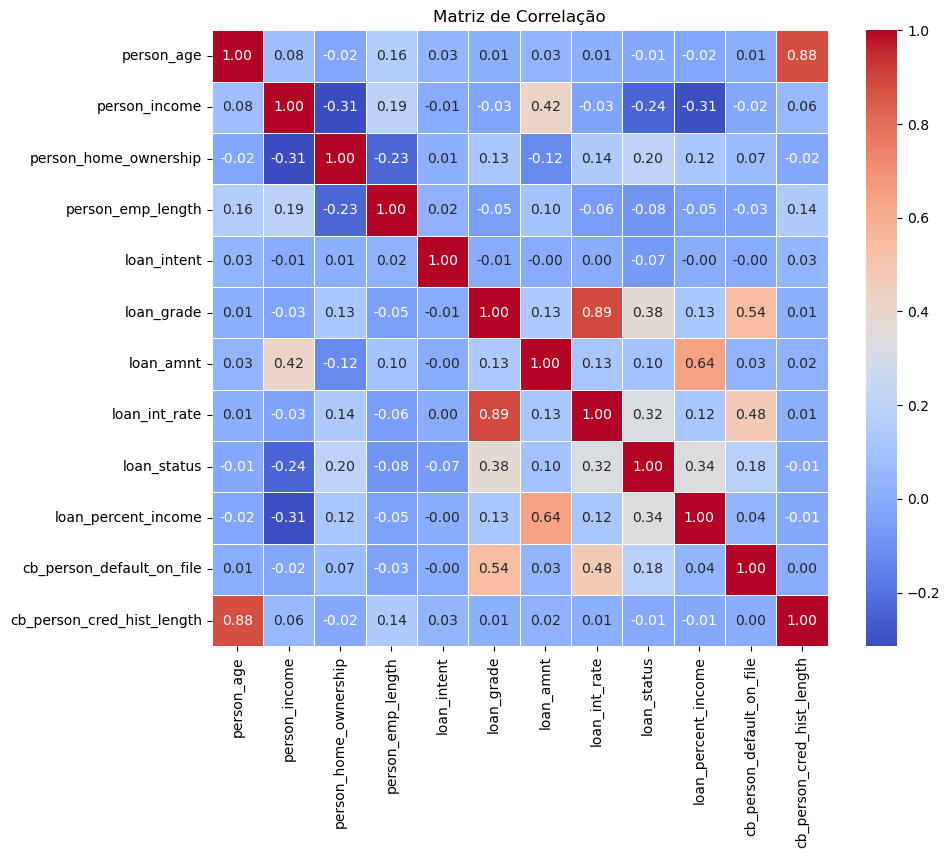

In [107]:
#Primeiramente tranformando as variáveis categóricas em númericas
columns_encoders = {}
for column in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    label_e = LabelEncoder()
    df[column] = label_e.fit_transform(df[column])
    columns_encoders[column] = label_e

#Agora visualizando correlações utilizando o hetmap
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths = 0.5, square=True)
plt.title('Matriz de Correlação')
plt.show()

In [108]:
#loan_status não possui correlação alta com nenhuma outra coluna. Mas vou ordenar para visualizar melhor
most_correlated_columns = correlation_matrix['loan_status'].sort_values(ascending=False)
print(most_correlated_columns)

loan_status                   1.00
loan_grade                    0.38
loan_percent_income           0.34
loan_int_rate                 0.32
person_home_ownership         0.20
cb_person_default_on_file     0.18
loan_amnt                     0.10
cb_person_cred_hist_length   -0.01
person_age                   -0.01
loan_intent                  -0.07
person_emp_length            -0.08
person_income                -0.24
Name: loan_status, dtype: float64


# Normalização da Variável Independente (loan_percent_income)

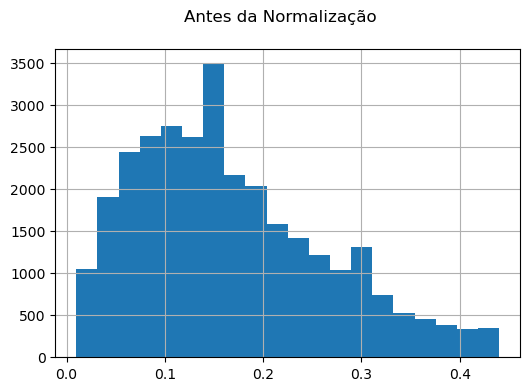

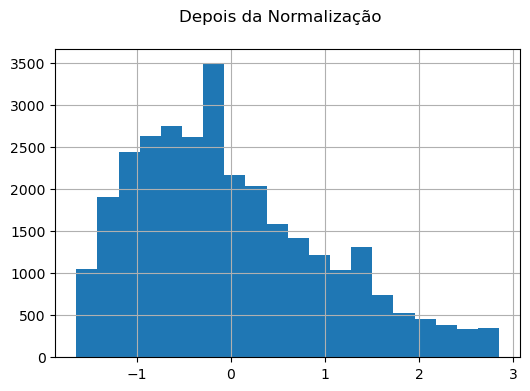

In [109]:
from sklearn.preprocessing import StandardScaler

#Inicio o Scalar
scaler = StandardScaler()

normalized_df = df.copy()

normalized_df['loan_percent_income'] = scaler.fit_transform(df[['loan_percent_income']])



#Histograma dos dados antes da normalização
df['loan_percent_income'].hist(bins=20, figsize=(6, 4))
plt.suptitle('Antes da Normalização')
plt.show()

#Histograma dos dados depois da normalizaçõa
normalized_df['loan_percent_income'].hist(bins=20, figsize=(6, 4))
plt.suptitle('Depois da Normalização')
plt.show()


df = normalized_df

## Transformação dos dados categoricos

In [110]:
label_encoder = LabelEncoder()
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['loan_int_rate'] = label_encoder.fit_transform(df['loan_int_rate'])

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5,1,1,1000,93,0,-0.70,0,2
5,21,9900,2,2,5,0,2500,15,1,0.87,0,2
7,24,78956,3,5,3,1,35000,91,1,2.85,0,4
8,24,83000,3,8,4,0,35000,39,1,2.64,0,2
9,21,10000,2,6,5,3,1600,202,1,-0.07,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,3,4,4,3,20000,228,1,1.49,1,19
32575,52,64500,3,0,1,1,5000,95,0,-0.91,0,20
32576,57,53000,0,1,4,2,5800,150,0,-0.60,0,30
32577,54,120000,0,4,4,0,17625,21,0,-0.18,0,19


# Treinamento do Modelo

In [111]:
#Variáveis independentes(X)
X = df[['loan_percent_income', 'loan_grade', 'loan_int_rate']]

#Variável dependente(x) ou target
y = df['loan_status']

#Aqui os dados são divididos em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Aqui ocorre o treinamento
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

# Avaliação do Modelo

In [112]:
#Aqui o modelo é testado com os dados de teste 
y_pred = logistic_regression.predict(X_test)

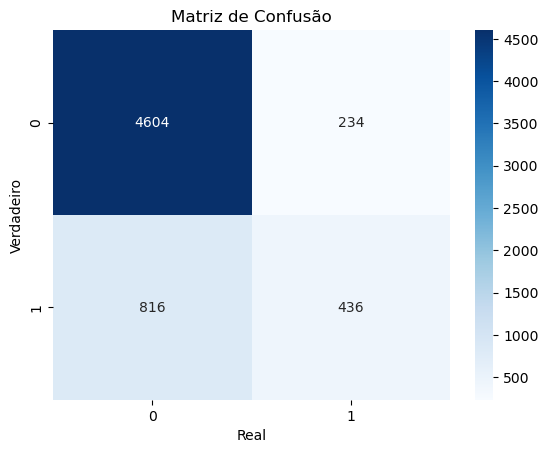

In [113]:
# Cálculo da Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a Matriz de Confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Real')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [114]:
#Calculando as métricas
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

#Exibindo os resultados por classe 
print("Precision por classe:", precision)
print("Recall por classe:", recall)
print("F1-Score por classe:", f1)

# Relatório completo de classificação
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

Precision por classe: [0.84944649 0.65074627]
Recall por classe: [0.95163291 0.34824281]
F1-Score por classe: [0.89764087 0.45369407]

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4838
           1       0.65      0.35      0.45      1252

    accuracy                           0.83      6090
   macro avg       0.75      0.65      0.68      6090
weighted avg       0.81      0.83      0.81      6090



# Validação Cruzada e Curva ROC

Acurácia por fold: [0.8270936  0.81491214 0.82985712 0.81606175 0.82542289]
Acurácia média: 0.8226694993070762
Desvio padrão: 0.00604408326811524


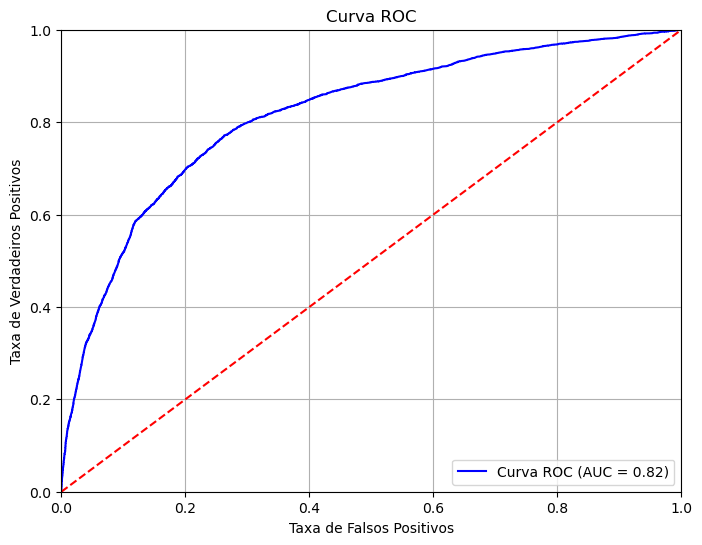

AUC: 0.8161511826946614


In [115]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, auc

# Realizando a validação cruzada utilizando 5 folds
scores = cross_val_score(logistic_regression, X, y, cv=5)

# Exibir as métricas de avaliação
print("Acurácia por fold:", scores)
print("Acurácia média:", np.mean(scores))
print("Desvio padrão:", np.std(scores))

#Realizando a validação cruzada para prever probabiblidades 
y_scores = cross_val_predict(logistic_regression, X, y, cv=5, method='predict_proba')

#Calculando a curva ROC e AUC
#fpr é a taxa de falso positivo, tpr é a taxa de verdadeiros positivos e thresholds são os limites para calcular essas taxas
fpr, tpr, thresholds = roc_curve(y, y_scores[:, 1])  # Para a classe positiva (1)

#Isso retorna um valor númerico que quantifica a capacidade do modelo de distinguir entre as classes positiva e negativa(0-1)
roc_auc = auc(fpr, tpr)

#Plotando a curva
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Exibir AUC
print("AUC:", roc_auc)

# Conclusão

Analisando as métricas básicas, percebe-se que o modelo é muito bom para classificar a classe 0 do loan_status (status de empréstimo), o que quer dizer que ele consegue prever que o empréstimo não está inadimplente, porém, o desempenho na classe 1 não é muito bom (empréstimo inadimplemente). Entretanto, quando fiz a validação cruzada utilizando 5 folds, o resultado foi muito bom, com uma acurácia média de um pouco mais de 82%, e, além disso, o desvio padrão foi muito baixo. Na AUC, o modelo obteve 0,8261 (82,61%), indicando que ele tem uma boa capacidade de distinguir entre as classes. Quero entender os possíveis erros e pontos de melhoria no desafio. Desde já agradeço a visualização do projeto e o feedback.